In [1]:
import copy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, roc_curve, auc, log_loss
from kmodes.kmodes import KModes

In [2]:
df = pd.read_csv('basics500.csv')

In [3]:
df.dtypes

Unnamed: 0     int64
earned        object
headline      object
hours         object
jobs          object
rate          object
skills        object
dtype: object

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.shape

(4920, 6)

In [6]:
df.dtypes

earned      object
headline    object
hours       object
jobs        object
rate        object
skills      object
dtype: object

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(3646, 6)

In [9]:
type(df.skills.iloc[7])

float

In [10]:
for i in df.skills.index:
    if type(df.skills.loc[i]) == float:
        df.skills.loc[i] = '[]'

In [11]:
df = df[pd.notnull(df['jobs'])]

In [12]:
df = df[pd.notnull(df['rate'])]

In [13]:
df = df[pd.notnull(df['headline'])]

In [14]:
df = df[pd.notnull(df['hours'])]

In [15]:
df = df.drop(['earned'], axis=1)

In [16]:
df['rate'] = df['rate'].map(lambda string: float(''.join([c for c in string if c.isdigit()]))/100)

In [17]:
df['hours'] = df['hours'].map(lambda string: int(''.join([c for c in string if c.isdigit()])))

In [18]:
df['jobs'] = df['jobs'].map(lambda string: int(''.join([c for c in string if c.isdigit()])))

In [19]:
df['skills'] = df['skills'].map(lambda string: string.replace('[', ""))

In [20]:
df['skills'] = df['skills'].map(lambda string: string.replace(']', ""))

In [21]:
df['skills'] = df['skills'].map(lambda string: string.replace("'", ""))

In [22]:
df['skills'] = df['skills'].map(lambda string: string.replace('"', ''))

In [23]:
df['skills'] = df['skills'].map(lambda string: string.split(", "))

In [24]:
df['skills'] = df['skills'].map(lambda l: (l, [])[l == ['']])

In [25]:
df.dtypes

headline     object
hours         int64
jobs          int64
rate        float64
skills       object
dtype: object

In [26]:
df.head()

,headline,hours,jobs,rate,skills
0,"System Admininstration, Web Design, Technical ...",4376,27,22.22,"[Copywriting, Research Papers, Article Writing..."
1,Experienced Marketing Project Manager,1605,21,30.00,"[Internet Marketing, Project Management, Editi..."
2,"Copywriter specializing in research, site copy...",2711,86,75.00,"[Blog Writing, Article Writing, Copywriting, C..."
3,FrontEnd Developer with 10 years professional ...,2805,37,50.00,"[React.js, Redux for JavaScript, JavaScript, C..."
4,Database developer,3526,23,75.00,"[Database Modeling, Database Design, Database ..."


In [27]:
df = df.reset_index(drop = True)

In [28]:
df.head()

,headline,hours,jobs,rate,skills
0,"System Admininstration, Web Design, Technical ...",4376,27,22.22,"[Copywriting, Research Papers, Article Writing..."
1,Experienced Marketing Project Manager,1605,21,30.00,"[Internet Marketing, Project Management, Editi..."
2,"Copywriter specializing in research, site copy...",2711,86,75.00,"[Blog Writing, Article Writing, Copywriting, C..."
3,FrontEnd Developer with 10 years professional ...,2805,37,50.00,"[React.js, Redux for JavaScript, JavaScript, C..."
4,Database developer,3526,23,75.00,"[Database Modeling, Database Design, Database ..."


In [ ]:
# df = df[df.rate < 200]

In [ ]:
y = df.rate

In [ ]:
plt.hist(y.values, bins = 100)
plt.title('Rates')

In [ ]:
meany = np.mean(y)
meany

In [ ]:
std = np.std(y)
std

In [29]:
skills_df = df['skills'].str.join('|').str.get_dummies()

In [30]:
for i in range(10):
    print(sum(skills_df.iloc[i, :]))

6
10
8
10
10
9
10
2
8
10


In [31]:
for i in range(10):
    print(len(df.iloc[i, 4]))

6
10
8
10
10
9
10
2
8
10


In [32]:
rate = copy.deepcopy(df.rate)

In [33]:
rate.head(10)

0    22.22
1    30.00
2    75.00
3    50.00
4    75.00
5    25.00
6    20.00
7    25.00
8    79.00
9    50.00
Name: rate, dtype: float64

In [34]:
rate = rate.reset_index(drop = True)

In [36]:
rate.head()

0    22.22
1    30.00
2    75.00
3    50.00
4    75.00
Name: rate, dtype: float64

In [35]:
df.head()

,headline,hours,jobs,rate,skills
0,"System Admininstration, Web Design, Technical ...",4376,27,22.22,"[Copywriting, Research Papers, Article Writing..."
1,Experienced Marketing Project Manager,1605,21,30.00,"[Internet Marketing, Project Management, Editi..."
2,"Copywriter specializing in research, site copy...",2711,86,75.00,"[Blog Writing, Article Writing, Copywriting, C..."
3,FrontEnd Developer with 10 years professional ...,2805,37,50.00,"[React.js, Redux for JavaScript, JavaScript, C..."
4,Database developer,3526,23,75.00,"[Database Modeling, Database Design, Database ..."


In [41]:
combined = pd.concat([skills_df, rate], axis = 1, sort = False)

In [42]:
combined.head()

,.NET Compact Framework,.NET Framework,.NET Remoting,1ShoppingCart,2D Animation,2D Design,3D Animation,3D Design,3D Modeling,3D Printing,...,j2 Global Campaigner,jQuery,jQuery UI,memoQ,mobi,phpMyAdmin,soapUI,vCita,webERP,rate
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22.22
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30.00
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,75.00
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,50.00
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,75.00


In [43]:
for i in range(10):
    print(sum(combined.iloc[i, :-1]))

6.0
10.0
8.0
10.0
10.0
9.0
10.0
2.0
8.0
10.0


In [44]:
for i in range(10):
    print(combined.iloc[i, -1])

22.22
30.0
75.0
50.0
75.0
25.0
20.0
25.0
79.0
50.0


In [80]:
sd_list = []
for c in combined.columns[:-1]: 
    skill_dict = dict.fromkeys(['mean', 'std', 'skill'], [])
    comb_g = combined.groupby(c)
    group_rate = comb_g.get_group(1)['rate']
    skill_dict['mean'] = np.mean(group_rate)
    skill_dict['std'] = np.std(group_rate)
    skill_dict['skill'] = str(c)
    skill_dict['count'] = len(group_rate)
    sd_list.append(skill_dict)

In [116]:
skill_table = pd.DataFrame(sd_list)

In [117]:
skill_table.head(10)

,count,mean,skill,std
0,3,34.000000,.NET Compact Framework,19.026298
1,23,79.654783,.NET Framework,44.473648
2,1,30.000000,.NET Remoting,0.000000
3,1,50.000000,1ShoppingCart,0.000000
4,11,45.704545,2D Animation,21.336274
5,26,40.048077,2D Design,17.288839
6,16,41.421875,3D Animation,20.012832
7,14,42.535714,3D Design,19.579704
8,29,42.017241,3D Modeling,18.630589
9,12,38.854167,3D Printing,17.262211


In [118]:
skill_table = skill_table.sort_values(by = ['mean'], ascending = False)
skill_table = skill_table.reset_index(drop = True)

In [119]:
skill_tab = skill_table[skill_table['count'] > 10]
skill_tab = skill_tab.reset_index(drop = True)

In [120]:
ds = skill_table[skill_table['skill'] == 'Data Science']

In [121]:
ds

,count,mean,skill,std
396,14,73.320714,Data Science,57.418433


In [122]:
skill_tab.iloc[0:40, :]

,count,mean,skill,std
0,12,158.291667,Sales Letters,121.317500
1,13,123.307692,Legal Consulting,66.452279
2,23,121.975217,Conversion Rate Optimization,192.007329
3,14,111.416429,Contract Drafting,71.493981
4,24,108.916667,Sales Writing,103.474500
5,21,107.594762,Business Coaching,202.671048
6,29,106.628276,Inbound Marketing,177.683333
7,14,105.357143,Marketing Management,248.780915
8,19,100.394737,YouTube Marketing,213.624768
9,20,92.354500,ClickFunnels,56.812106


AttributeError: 'dict' object has no attribute 'set_xticklabels'

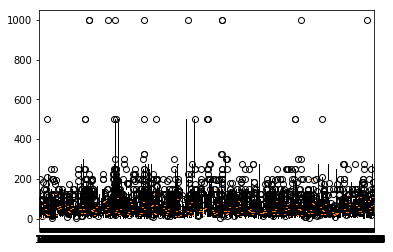

In [49]:
bplot = plt.boxplot(skill_rates)
bplot.set_xticklabels(combined.columns[0:-1])
bplot.set_ylim([0,200])

In [ ]:
km = KModes(n_clusters=12, init='Huang', n_init=6, verbose=1)
clusters = km.fit_predict(skills_df)
print(km.cluster_centroids_)

In [ ]:
kmodes = km.cluster_centroids_
shape = kmodes.shape

In [ ]:
for i in range(shape[0]):
    if sum(kmodes[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("no-skills cluster")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodes[i,:]
        for j in skills_df.columns[np.nonzero(cent)]:
            print(j)

In [ ]:
clust_assigned = km.predict(skills_df)

In [ ]:
unique, counts = np.unique(clust_assigned, return_counts=True)
dict(zip(unique, counts))

In [ ]:
restrict = copy.deepcopy(skills_df)
for name in restrict.columns:
    if sum(restrict[name]) < 50:
        restrict = restrict.drop([name], axis = 1)

In [ ]:
restrict.head()

In [ ]:
km2 = KModes(n_clusters=15, init='Huang', n_init=11, verbose=1)
clusters = km2.fit_predict(restrict)
print(km2.cluster_centroids_)

In [ ]:
kmodes2 = km2.cluster_centroids_
shape2 = kmodes2.shape

In [ ]:
for i in range(shape2[0]):
    if sum(kmodes2[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("no-skills cluster")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodes2[i,:]
        for j in restrict.columns[np.nonzero(cent)]:
            print(j)

In [ ]:
clust_assigned2 = km2.predict(restrict)

In [ ]:
unique2, counts2 = np.unique(clust_assigned2, return_counts=True)
dict(zip(unique2, counts2))

In [ ]:
df.shape

In [ ]:
for_box = np.stack((clust_assigned, y), axis = 1)

In [ ]:
box_df = pd.DataFrame(for_box)

In [ ]:
box_df.columns = ['cluster', 'rate']

In [ ]:
dfg = box_df.groupby('cluster')
counts = [len(v) for k, v in dfg]
total = float(sum(counts))
cases = len(counts)
widths = [c/total for c in counts]  
cax = box_df.boxplot(column='rate', by='cluster', figsize=(15,10))
cax.set_xticklabels(['%s\n$n$=%d'%(k, len(v)) for k, v in dfg])
cax.set_ylim([0,200])

In [ ]:
box_means = dfg.mean()

In [ ]:
df.shape

In [ ]:
y_and_cluster_means = pd.merge(box_means, box_df, how='inner', on='cluster', left_on=None, right_on=None,
         left_index=False, right_index=True, sort=False,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [ ]:
y_and_cluster_means.head()

In [ ]:
r2_score(y_and_cluster_means.rate_y, y_and_cluster_means.rate_x)

In [ ]:
df.shape

In [ ]:
X = df.drop(['rate'], axis = 1)

In [ ]:
X.skills = X.skills.map(lambda li: len(li))

In [ ]:
X.head()

In [ ]:
plt.hist(X.skills)

In [ ]:
fn = lambda row: len(row.headline) # define a function for the new column
X = X.assign(head_len = X.apply(fn, axis=1).values)

In [ ]:
X.head()

In [ ]:
fn = lambda row: len(row.headline.split(' ')) # define a function for the new column
X = X.assign(head_num_words = X.apply(fn, axis=1).values)

In [ ]:
X.head()

In [ ]:
X = X.drop(['headline'], axis = 1)

In [ ]:
X.head()

In [ ]:
X.shape

In [ ]:
clust = pd.Series(clust_assigned)

In [ ]:
clust.shape

In [ ]:
clust = clust.reset_index(drop = True)

In [ ]:
X = X.reset_index(drop = True)

In [ ]:
result = pd.concat([X, clust], axis = 1, sort = False, ignore_index = True)

In [ ]:
result.shape

In [ ]:
result.head()

In [ ]:
result.columns = ['hours', 'jobs', 'skills', 'head_len', 'head_num_words', 'cluster']

In [ ]:
result.dtypes

In [ ]:
result.head()

In [ ]:
result_dum = pd.get_dummies(result, columns = ['cluster'])

In [ ]:
result_dum.head()

In [ ]:
result_dum.shape

In [ ]:
min(result_dum.jobs)

In [ ]:
tr = DecisionTreeRegressor(max_depth = 5)
trmodel = tr.fit(result_dum, y)

In [ ]:
trmodel.score(result_dum, y)

In [ ]:
np.mean(cross_val_score(trmodel, result_dum, y, scoring = 'r2', cv = 4))

In [ ]:
np.sqrt(-1*np.mean(cross_val_score(trmodel, result_dum, y, scoring = 'neg_mean_squared_error', cv = 4)))

In [ ]:
rf = RandomForestRegressor(n_estimators = 500, max_depth = 5)
rfmodel = rf.fit(result_dum, y)

In [ ]:
rfmodel.score(result_dum, y)

In [ ]:
np.mean(cross_val_score(rfmodel, result_dum, y, scoring = 'r2', cv = 4))

In [ ]:
np.sqrt(-1*np.mean(cross_val_score(rfmodel, result_dum, y, scoring = 'neg_mean_squared_error', cv = 4)))

In [ ]:
ada = AdaBoostRegressor(n_estimators = 10000, learning_rate = 0.01)
adamodel = ada.fit(result_dum, y)

In [ ]:
adamodel.score(result_dum, y)

In [ ]:
np.mean(cross_val_score(adamodel, result_dum, y, scoring = 'r2', cv = 4))

In [ ]:
np.sqrt(-1*np.mean(cross_val_score(adamodel, result_dum, y, scoring = 'neg_mean_squared_error', cv = 4)))

In [ ]:
scaler = StandardScaler()
data_std = scaler.fit_transform(X)
data_std = pd.DataFrame(data_std)
data_std.columns = list(X)

In [ ]:
data_std

In [ ]:
max_hours = max(X.hours)
min_hours = min(X.hours)
max_jobs = max(X.jobs)
min_jobs = min(X.jobs)
max_skills = max(X.skills)
min_skills = min(X.skills)

In [ ]:
min_skills

In [ ]:
X.hours = X.hours.map(lambda h: (h - min_hours)/(max_hours - min_hours))

In [ ]:
X.jobs = X.jobs.map(lambda h: (h - min_jobs)/(max_jobs - min_jobs))

In [ ]:
X.skills = X.skills.map(lambda h: (h - min_skills)/(max_skills - min_skills))

In [ ]:
X.head()

In [ ]:
vals = StandardScaler().fit_transform(X)

In [ ]:
parameters = {'metric':('jaccard', 'matching', 'dice', 'kulsinski', 'rogerstanimoto', 'russellrao', 
                        'sokalmichener', 'sokalsneath'), 'n_neighbors':[2, 10, 25, 50, 100]}

In [ ]:
neigh = KNeighborsRegressor()
reg = GridSearchCV(neigh, parameters, cv = 4, scoring = 'neg_mean_squared_error')
reg.fit(result_dum, y) 

In [ ]:
bestknn = reg.best_params_

In [ ]:
bestknn

In [ ]:
knnbest = KNeighborsRegressor(n_neighbors = bestknn['n_neighbors'], metric = bestknn['metric'])
np.sqrt(-1*np.mean(cross_val_score(knnbest, result_dum, y, scoring = 'neg_mean_squared_error', cv = 4)))

In [ ]:
np.mean(cross_val_score(knnbest, result_dum, y, scoring = 'r2', cv = 4))

In [ ]:
ridgeReg = Ridge(alpha=100)

In [ ]:
ridgeReg.fit(result_dum, y)

In [ ]:
coef = pd.Series(ridgeReg.coef_, result_dum.columns).sort_values()

In [ ]:
coef.plot(kind='bar', title='Model Coefficients')

In [ ]:
cv = 10
m = cross_val_score(Ridge(alpha=.0001), result_dum, y, scoring = 'r2', cv = cv)

In [ ]:
m

In [ ]:
np.mean(m)

In [ ]:
LR = LinearRegression()

In [ ]:
model = LR.fit(new_X, y)

In [ ]:
model.score(new_X,y)

In [ ]:
y_pred = model.predict(new_X)

In [ ]:
min(model.coef_)

In [ ]:
model.intercept_

In [ ]:
d = {'names' : new_names, 'coefs' : model.coef_}

In [ ]:
FI = pd.DataFrame(d)

In [ ]:
sorted_FI = FI.sort_values(by=['coefs'])

In [ ]:
sorted_FI

In [ ]:
np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
r2_score(y, y_pred)

In [ ]:
plt.hist(X[:,0], bins = 20)
plt.title('Hours Worked')

In [ ]:
plt.hist(X[:,1], bins = 20)
plt.title('Jobs Done')

In [ ]:
plt.hist(X[:,2], bins = 20)
plt.title('Number of Skills')

In [ ]:
XT = X.T

In [ ]:
new_XT = new_X.T

In [ ]:
prod = XT @ X

In [ ]:
new_prod = new_XT @ new_X

In [ ]:
inv = np.linalg.inv(prod)

In [ ]:
new_inv = np.linalg.inv(new_prod)

In [ ]:
triple_X = inv @ XT

In [ ]:
theta = triple_X @ y

In [ ]:
preds = [theta @ X[i,:] for i in range(len(y))]

In [ ]:
err = [(y[i] - preds[i])for i in range(len(y))]

In [ ]:
theta2 = theta*1.1

In [ ]:
preds2 = [theta2 @ X[i,:] for i in range(len(y))]
err2 = [(y[i] - preds2[i]) for i in range(len(y))]

In [ ]:
RMSE = (sum([e**2 for e in err])/len(y))**0.5
RMSE2 = (sum([e**2 for e in err2])/len(y))**0.5

In [ ]:
RMSE, RMSE2

In [ ]:
RMSE2 - RMSE

In [ ]:
results = sm.OLS(y, X).fit()

In [ ]:
print(list(zip(list(names),list(theta/100))))

In [ ]:
print(results.summary())